<a href="https://colab.research.google.com/github/Stefan566/Fraud_detection/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
# Preparations
le = LabelEncoder()
lr = LogisticRegression()

Download data. Since the test data set is unlabled I'm usind the train data only and split it.


In [0]:
df_id = pd.read_csv('/gdrive/My Drive/ieee-fraud-detection/train_identity.csv')
df_tr = pd.read_csv('/gdrive/My Drive/ieee-fraud-detection/train_transaction.csv')


In [0]:
# Merge Data
df = pd.merge(df_id, df_tr, on='TransactionID', how='left')

In [0]:
# Remove Columns containing NaN
# df = df.dropna(axis=0,thresh=int(df.shape[1]/2))
# df = df.dropna(axis=1,thresh=int(df.shape[0]/2))
df.dropna(axis=1,inplace=True)

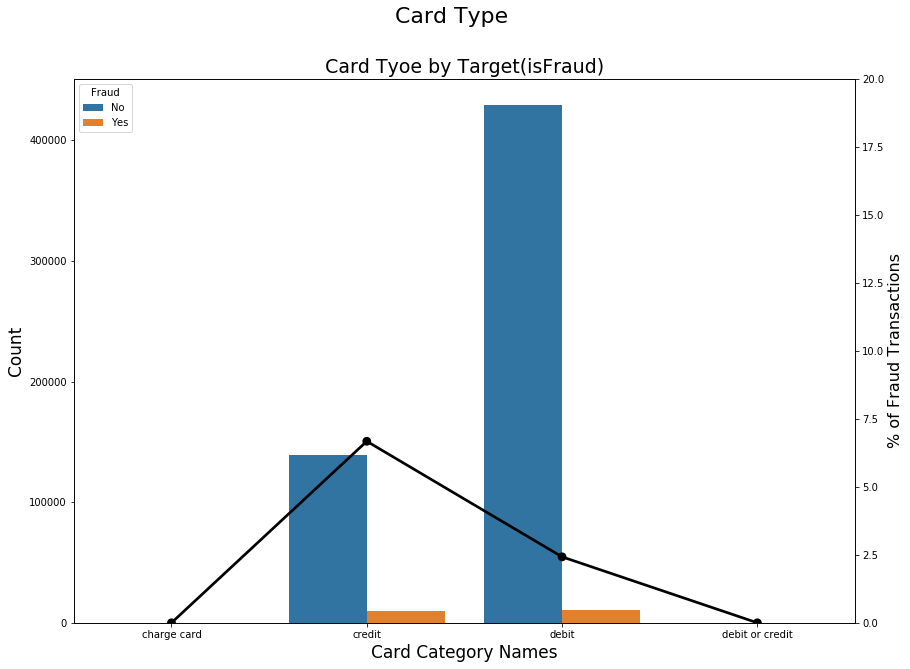

In [0]:
# Visualisation
# We want to see if it is more likely fraud in case of a debit or a credit card. we will need the column isFraud and card6
tmp = pd.crosstab(df_tr['card6'], df_tr['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card Type', fontsize=22)

plot = sns.countplot(x='card6', hue='isFraud', data=df_tr, order=list(tmp.card6.values))
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
plot_2 = plot.twinx()
plot_2 = sns.pointplot(x='card6', y='Fraud', data=tmp, order=list(tmp.card6.values),
                   color='black', legend=False, )
plot_2.set_ylim(0,20)
plot_2.set_ylabel("% of Fraud Transactions", fontsize=16)
plot.set_title("Card Tyoe by Target(isFraud)", fontsize=19)
plot.set_xlabel("Card Category Names", fontsize=17)
plot.set_ylabel("Count", fontsize=17)

plt.show()

In [0]:
# Turn strings into numbers
string_list = df.select_dtypes('object').columns
for col in string_list:
  df[col] = le.fit_transform(list(df[col]))


In [0]:
# Prepare train und test data
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.35)


In [0]:
# Finally train the model 
lr.fit(X_train,y_train)
print ('Score: ', lr.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9217939067390357
